* OpenCV (cv2): Used for image processing tasks such as reading and manipulating images, which is crucial for preparing data for model training.
* Pandas (pd): Provides data manipulation and analysis capabilities, particularly useful for handling structured data.
* Seaborn (sns): A data visualization library based on matplotlib, designed to create visually appealing and informative statistical graphics.
* NumPy (np): Fundamental package for scientific computing in Python, used for handling large, multi-dimensional arrays and matrices.
* os and glob: Utilized for file operations like reading file names and directories, helping in managing datasets stored in the file system.
* random: Provides functions that support generating random numbers, which can be used for data shuffling or random sampling.
* PIL (Pillow): An image library for opening, manipulating, and saving many different image file formats.
* TensorFlow (tf) and Keras: Core libraries for building and training deep learning models. TensorFlow provides a comprehensive ecosystem of tools and libraries for machine learning, while Keras offers a high-level interface for neural networks.
* matplotlib.pyplot: Used for creating static, animated, and interactive visualizations in Python.
* ImageDataGenerator, Sequential, Dense, Flatten, MaxPooling2D, Dropout, Conv2D, BatchNormalization, GlobalAveragePooling2D: Components from TensorFlow and Keras for data preprocessing, model building, and compiling. These include layers for convolution, pooling, normalization, etc., which are essential for constructing convolutional neural networks (CNNs).
* ModelCheckpoint, EarlyStopping: Callbacks in Keras to enhance training by saving the model at certain intervals and stopping training when a monitored metric has stopped improving.
* plotly.express (px): Advanced interactive plotting library, useful for making interactive plots.
* sklearn.metrics: Functions for calculating performance metrics like f1 score, accuracy, precision, and recall to evaluate the model.

In [ ]:
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
import os
import glob
import random
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
import plotly.express as px
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#### Showing the random train Images for all types of DIGITS

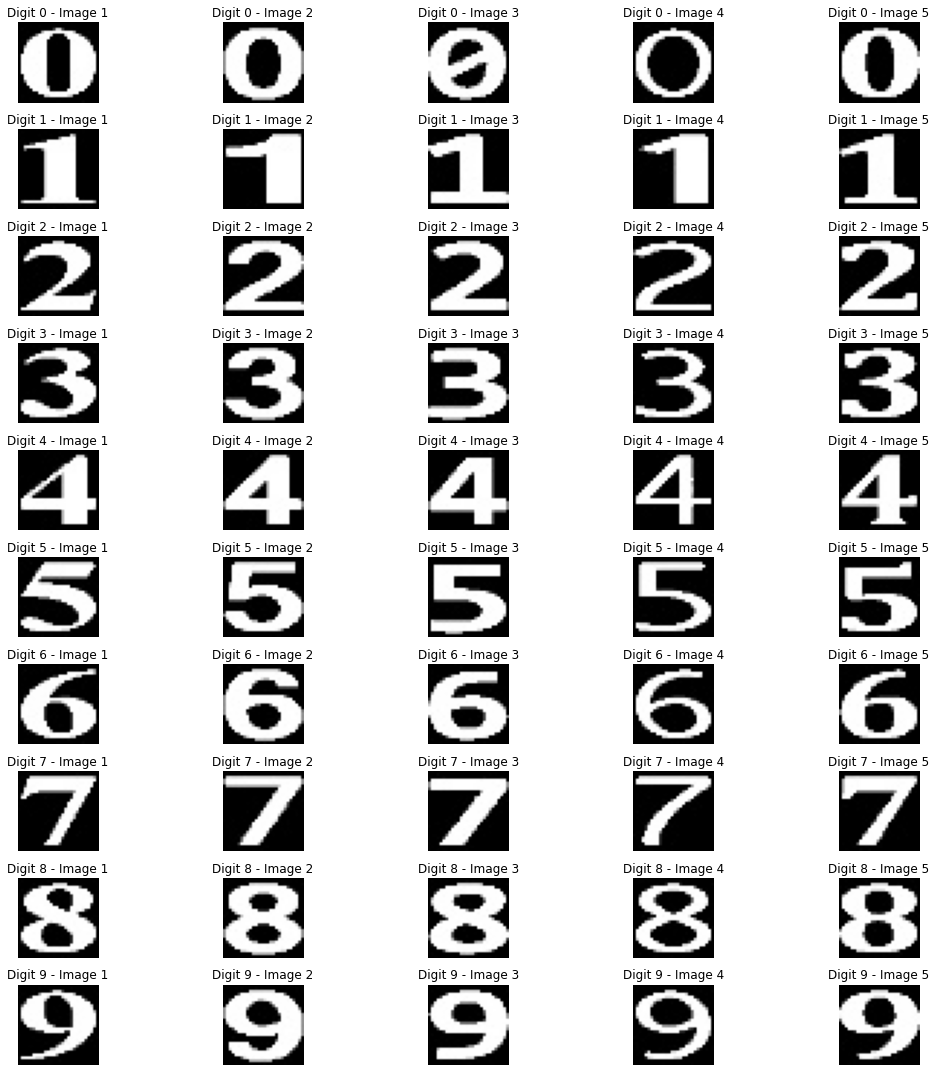

In [22]:
# Base path where images are stored
base_path = "/kaggle/input/ai-indian-license-plate-recognition-data/data/data/train"

# Prepare to display the images
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15, 15))

# Iterate over each digit from 0 to 9
for digit in range(10):
    # Construct the path to each class directory
    class_dir = os.path.join(base_path, f"class_{digit}")
    
    # Get the list of images in the directory
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
    
    # Sort the files to ensure consistency in selection
    image_files.sort()
    
    # Display the first 5 images for each digit
    for i, file_name in enumerate(image_files[:5]):
        # Load the image
        img_path = os.path.join(class_dir, file_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB
        
        # Show the image
        ax = axes[digit, i]
        ax.imshow(img)
        ax.axis('off')  # Turn off axis
        ax.set_title(f"Digit {digit} - Image {i+1}")

# Adjust layout and display the images
plt.tight_layout()
plt.show()


* XML file that contains a pre-trained Haar cascade classifier, specifically designed for recognizing Indian license plates in images. This classifier is loaded using OpenCV's CascadeClassifier method. The code checks if the cascade has loaded successfully by verifying if the empty method of the classifier object returns True (indicating a failure to load) or False (indicating successful loading). 
* If the classifier fails to load, it prints an error message; 
* if it loads successfully, it prints a confirmation message.

In [23]:
# xml data 
plate_cascade = cv2.CascadeClassifier('../input/ai-indian-license-plate-recognition-data/indian_license_plate.xml')

if plate_cascade.empty():
    print("Error loading the cascade classifier")
else:
    print("Cascade classifier loaded successfully")


Cascade classifier loaded successfully


In [24]:
def detect_license_plate(img, text=''):
    """
    Detect and highlight license plate(s) in an image.

    Args:
        img (numpy.ndarray): Input image.
        text (str, optional): Text to overlay on the detected license plate. Defaults to ''.

    Returns:
        tuple: A tuple containing:
            - plate_img (numpy.ndarray): Image with detected license plate highlighted.
            - plate (numpy.ndarray): Cropped region of the detected license plate.
    """
    plate_img = img.copy()
    roi = img.copy()
    plate_rectangles = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=7)
    
    for (x, y, w, h) in plate_rectangles:
        roi_ = roi[y:y+h, x:x+w, :] 
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2, y), (x+w-3, y+h-5), (51, 181, 155), 3) 

    if text != '':
        # Draw text on the image
        cv2.putText(plate_img, text, (x-w//2, y-h//2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 
                    0.5, (51, 181, 155), 1, cv2.LINE_AA)
        
    return plate_img, plate


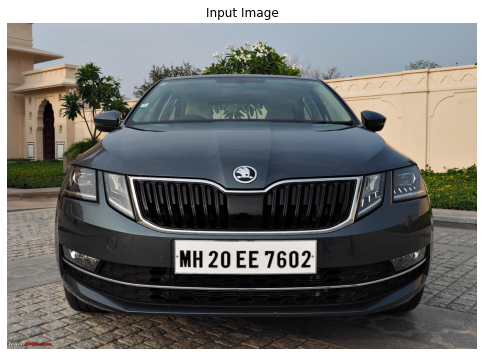

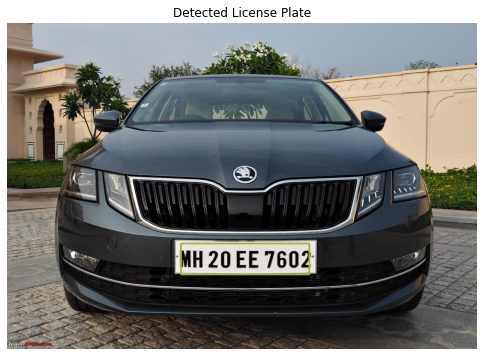

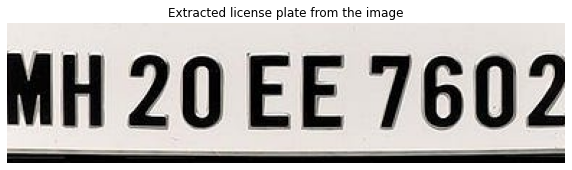

In [25]:
def display(img_, title=''):
    """
    Display an image using matplotlib.

    Args:
        img_ (numpy.ndarray): Input image in BGR format.
        title (str): Title for the displayed image.
    """
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load the cascade classifier for license plate detection
plate_cascade = cv2.CascadeClassifier('/kaggle/input/ai-indian-license-plate-recognition-data/indian_license_plate.xml')

# Load and display the input image
img = cv2.imread('/kaggle/input/test-cars/car6.jpg')
display(img, 'Input Image')

# Detect and display license plates in the image
plate_img, plate = detect_license_plate(img)
display(plate_img, 'Detected License Plate')


#Extracted license plate from the image
display(plate, 'Extracted license plate from the image')

* Contour Detection: The function begins by identifying all contours in the image using cv2.findContours. It processes a binary image (expected to be passed in img) to find contour lines.
* Filter Contours by Size: The contours are then sorted by area, and only the largest up to 15 are considered for further processing, assuming that these could be relevant to license plates or characters based on their size.
* Character Region Extraction: For each of these contours:
    * The bounding rectangle is calculated using cv2.boundingRect.
    * The dimensions of each bounding rectangle are checked against provided dimensions (expected to define the acceptable width and height range for character plates or characters).
    * If a contour fits the dimension criteria, it is considered a potential character, and its image region is extracted.
* Character Image Preparation:
    * Each character image is resized to a standard size (20x40 pixels).
    * The color is inverted to prepare for classification (character in white, background in black).
    * A black border is added to each character image to bring it to a final size of 24x44 pixels.
* Image Display and Sorting:
    * During the extraction, rectangles are drawn around potential characters and the image is displayed using matplotlib.
    * Extracted characters are sorted based on their x-coordinate to ensure they are in the correct order as they appear from left to right on the license plate.
* Return Processed Characters:

In [26]:
# Match contours to license plate or character template
def extract_and_preprocess_characters(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

* **Preprocessing**:
    * The input image, assumed to be a cropped license plate, is first resized to a fixed size of 333x75 pixels.
    * The resized image is then converted to grayscale using cv2.cvtColor.
    * A binary thresholding operation is applied using cv2.threshold to convert the grayscale image into a binary image, where pixel values above a certain threshold are set to white (255) and those below are set to black (0).
    * Morphological operations (erosion followed by dilation) are performed using cv2.erode and cv2.dilate to remove noise and refine the binary image.
* **Border Handling:**
    * The function ensures that the borders of the license plate region in the binary image are white (255). This step helps in separating characters from the plate border during contour detection.
    * Character Size Estimation:
    * The function estimates the dimensions of character contours based on the size of the cropped license plate. It defines dimensions as fractions of the plate's width and height. This step helps in filtering out contours that are unlikely to represent characters based on their size.
* **Visual Feedback:**
    * The preprocessed binary image is displayed using Matplotlib for visual verification. This step allows users to observe the effects of preprocessing on the image.
    * Character Extraction:
    * The function calls extract_and_preprocess_characters, passing the estimated dimensions and the preprocessed binary image. This helper function identifies and preprocesses potential character regions within the license plate.
* **Return Processed Characters:**
    * The function returns a list of character images (char_list) extracted from the license plate. These images are processed and sorted according to their position from left to right.

In [27]:
# Find characters in the resulting images
def extract_image_with_character_segmentation(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = extract_and_preprocess_characters(dimensions, img_binary_lp)

    return char_list

* It calls the function extract_image_with_character_segmentation, passing the variable plate, which presumably contains the cropped license plate image.
* The returned value char is a list containing the segmented character images extracted from the license plate.
* It calculates the total number of characters (totalCharacters) extracted from the license plate.
* It iterates over each character image in the list char and displays it using Matplotlib's plt.imshow function. The cmap='gray' argument specifies that the images should be displayed in grayscale, and plt.axis('off') removes the axis labels.

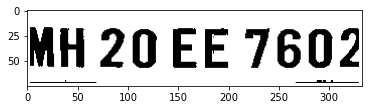

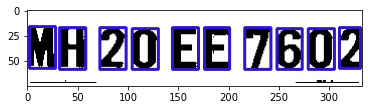

Characters


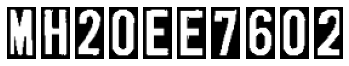

In [59]:
# Let's see the segmented characters
char = extract_image_with_character_segmentation(plate)
totalCharacters = len(char)

print('Characters')
for i in range(totalCharacters):
    plt.subplot(1, totalCharacters, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

* #### Importing Required Modules
* #### Defining Data Augmentation
* #### Setting Data Directories
* #### Configuring the Training Data Generator
* #### Configuring the Validation Data Generator

In [60]:
import tensorflow.keras.backend as kerasBackend
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = '../input/ai-indian-license-plate-recognition-data/data/data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse') #sparse

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')  #sparse

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


* #### f1score Function:
    * This function calculates the F1 score, a common metric for evaluating classification models' performance.

* #### custom_f1score Function:
    * This function is a wrapper around the f1score function, allowing it to be used as a custom metric in TensorFlow/Keras.

In [61]:
# Metrics for checking the model performance while training
def f1score(y, y_pred):
    return f1_score(y, tf.math.argmax(y_pred, axis=1), average='micro') 

def custom_f1score(y, y_pred):
    return tf.py_function(f1score, (y, y_pred), tf.double)

In [32]:
def accuracy(y_true, y_pred):
    return accuracy_score(y_true, tf.math.argmax(y_pred, axis=1))

def custom_accuracy(y_true, y_pred):
    return tf.py_function(accuracy, (y_true, y_pred), tf.double)

* **In this hybrid model:**
* We start with convolutional layers to extract features from the input images.
* Then, we use recurrent layers (specifically, GRU in this case) to capture sequential dependencies among characters.
* Finally, we add dense layers for classification, followed by compilation with appropriate loss, optimizer, and metrics.

In [89]:
from tensorflow.keras.layers import LSTM, GRU, TimeDistributed

# Clear previous session
kerasBackend.clear_session()

# Define hybrid model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Recurrent layers
model.add(TimeDistributed(Flatten()))  # Ensure time distribution over each input timestep
model.add(GRU(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Adding dropout for regularization

# Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))  # Output layer

# Compile the model with specified loss, optimizer, and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy', custom_f1score])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 14, 896)           0         
_________________________________________________________________
gru (GRU)                    (None, 14, 128)           393984    
_________________________________________________________________
dropout (Dropout)            (None, 14, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0

**This callback is useful for implementing early stopping based on a specific metric (in this case, the custom F1 score) during model training. Early stopping helps prevent overfitting by terminating training when the model starts to overfit the validation data, thus saving computational resources and time.**

In [92]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_custom_f1score') > 0.992):
            self.model.stop_training = True

**this segment trains the model on the provided data generators while monitoring the validation custom F1 score. If the validation F1 score exceeds 0.992 during training, the training process will be stopped early, thanks to the custom callback implemented.**

In [91]:
# Fit the model
batch_size = 1
# Callback instance
callbacks = [stop_training_callback()]

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    epochs=20,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/20
864/864 [==============================] - 15s 18ms/step - loss: 3.0256 - accuracy: 0.1921 - custom_f1score: 0.1921 - val_loss: 1.7647 - val_accuracy: 0.5602 - val_custom_f1score: 0.5580
Epoch 2/20
864/864 [==============================] - 15s 18ms/step - loss: 1.3517 - accuracy: 0.5914 - custom_f1score: 0.5914 - val_loss: 0.7495 - val_accuracy: 0.7870 - val_custom_f1score: 0.7842
Epoch 3/20
864/864 [==============================] - 15s 17ms/step - loss: 0.7867 - accuracy: 0.7558 - custom_f1score: 0.7558 - val_loss: 0.6336 - val_accuracy: 0.7917 - val_custom_f1score: 0.7902
Epoch 4/20
864/864 [==============================] - 15s 18ms/step - loss: 0.5621 - accuracy: 0.8160 - custom_f1score: 0.8160 - val_loss: 0.4361 - val_accuracy: 0.8611 - val_custom_f1score: 0.8616
Epoch 5/20
864/864 [==============================] - 15s 17ms/step - loss: 0.4102 - accuracy: 0.8576 - custom_f1score: 0.8576 - val_loss: 0.3014 - val_accuracy: 0.9167 - val_custom_f1score: 0.9167
Epoch 6/20

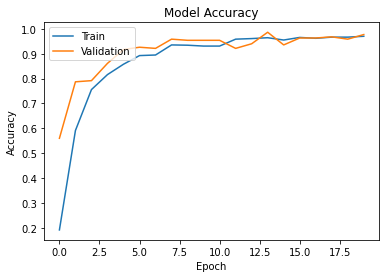

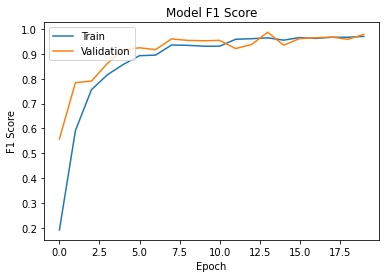

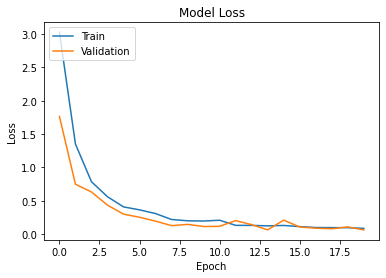

In [93]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation f1 scores values
plt.plot(history.history['custom_f1score'])
plt.plot(history.history['val_custom_f1score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**This function processes each character image from the license plate, predicts its class (character), and constructs the predicted license plate number by concatenating the predicted characters. It provides a convenient way to predict the characters in a license plate image using the trained model.**

In [94]:
# Predicting the output
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = model.predict_classes(img)[0] #predicting the class
        character = dic[y_] #
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results())

ZH20EE7602


* Plotting Segmented Characters:
    * It creates a figure with a size of 10x6 inches to accommodate the subplots.
    * It iterates over each character image (ch) in the char list.
* For each character:
    * The character image is resized to 36x36 pixels using OpenCV's resize function.
    * A subplot is created, and the resized character image is displayed using imshow.
    * The title of each subplot is set to the predicted value of the character using the show_results function.
    * Axis labels are turned off for each subplot to remove unnecessary clutter.
* Finally, the plot is displayed using plt.show().

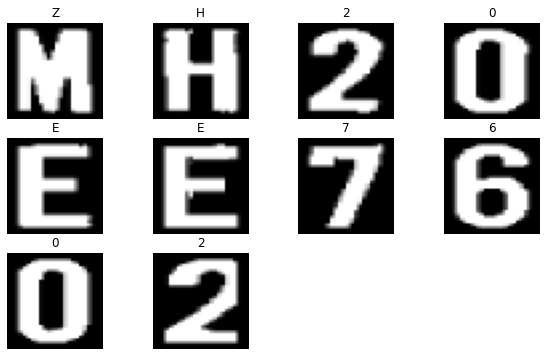

In [95]:
# Segmented characters and their predicted value.
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (36,36), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(show_results()[i])
    plt.axis('off')
plt.show()